In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_datareader import data, wb
import datetime
from datetime import date, timedelta
%matplotlib inline

In [2]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2020, 1, 1)

In [3]:
bank="JPM"
stocks = data.DataReader(bank, 'yahoo', start, end)

In [4]:
stocks.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,42.130001,41.450001,41.619999,41.669998,20143100.0,30.802694
2010-01-04,42.990002,41.669998,41.790001,42.849998,35460500.0,31.713005
2010-01-05,43.840000,42.779999,42.790001,43.680000,41208300.0,32.327271
2010-01-06,44.090000,43.310001,43.450001,43.919998,27729000.0,32.504898
2010-01-07,45.119999,43.610001,43.790001,44.790001,44864700.0,33.148777


Text(0, 0.5, 'Closing Stock Price')

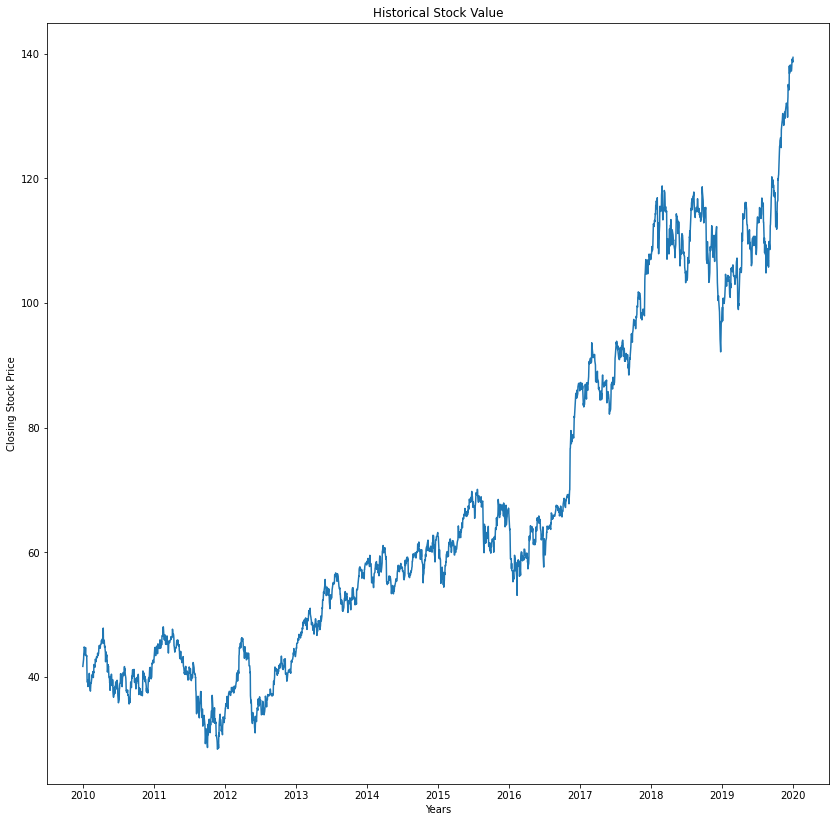

In [5]:
plt.figure(figsize=(14,14))
plt.plot(stocks['Close'])
plt.title('Historical Stock Value')
plt.xlabel('Years')
plt.ylabel('Closing Stock Price')

In [6]:
df=stocks.reset_index()['Close']

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [8]:
train_size=int(len(df)*0.70)
test_size=len(df)-train_size
train_data=df[0:train_size]
test_data=df[train_size:]

In [9]:
def make_dataset(data,timestep):
    X=[]
    y=[]
    n=len(data)
    for i in range(0,n-timestep-1):
        X.append(data[i:i+timestep])
        y.append(data[i+timestep])
    return np.array(X),np.array(y)

In [10]:
timestep=2
X_train,y_train=make_dataset(train_data,timestep)
X_test,y_test=make_dataset(test_data,timestep)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(timestep,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 2, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=110,batch_size=40,verbose=1)

Epoch 1/110
44/44 [==============================] - 4s 22ms/step - loss: 0.0196 - val_loss: 0.1949
Epoch 2/110
44/44 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0052
Epoch 3/110
44/44 [==============================] - 0s 5ms/step - loss: 3.3533e-04 - val_loss: 0.0157
Epoch 4/110
44/44 [==============================] - 0s 5ms/step - loss: 1.1818e-04 - val_loss: 0.0142
Epoch 5/110
44/44 [==============================] - 0s 5ms/step - loss: 1.0468e-04 - val_loss: 0.0085
Epoch 6/110
44/44 [==============================] - 0s 5ms/step - loss: 1.0125e-04 - val_loss: 0.0064
Epoch 7/110
44/44 [==============================] - 0s 5ms/step - loss: 9.3749e-05 - val_loss: 0.0041
Epoch 8/110
44/44 [==============================] - 0s 5ms/step - loss: 9.2686e-05 - val_loss: 0.0025
Epoch 9/110
44/44 [==============================] - 0s 5ms/step - loss: 8.8498e-05 - val_loss: 0.0020
Epoch 10/110
44/44 [==============================] - 0s 5ms/step - loss: 8.5938

In [15]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [16]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [17]:
import math
from sklearn.metrics import mean_squared_error 

In [18]:
train_predict

array([[42.200916],
       [43.224342],
       [43.789974],
       ...,
       [87.220825],
       [87.40584 ],
       [87.55729 ]], dtype=float32)

In [19]:
test_predict

array([[ 86.657364],
       [ 87.31983 ],
       [ 87.6737  ],
       [ 87.12124 ],
       [ 86.69511 ],
       [ 86.72902 ],
       [ 86.88018 ],
       [ 87.32389 ],
       [ 87.27452 ],
       [ 87.04087 ],
       [ 85.79257 ],
       [ 84.27771 ],
       [ 84.18456 ],
       [ 84.01433 ],
       [ 84.23333 ],
       [ 84.734764],
       [ 85.90283 ],
       [ 86.95151 ],
       [ 87.42485 ],
       [ 87.09398 ],
       [ 85.94409 ],
       [ 85.34089 ],
       [ 85.34257 ],
       [ 86.37972 ],
       [ 87.58024 ],
       [ 87.33578 ],
       [ 86.947655],
       [ 87.12781 ],
       [ 87.70034 ],
       [ 88.13964 ],
       [ 89.42878 ],
       [ 90.67565 ],
       [ 91.19903 ],
       [ 91.02419 ],
       [ 91.234604],
       [ 91.67603 ],
       [ 91.7361  ],
       [ 91.393005],
       [ 91.01219 ],
       [ 91.15615 ],
       [ 92.67653 ],
       [ 93.57362 ],
       [ 93.108215],
       [ 93.042046],
       [ 92.3293  ],
       [ 91.961426],
       [ 92.02572 ],
       [ 92.0

In [20]:
lookback=timestep
trainPlot=np.empty_like(df)
trainPlot[:,:]=np.nan
trainPlot[lookback:len(train_predict)+lookback, :]=train_predict

testPlot=np.empty_like(df)
testPlot[:, :]=np.nan
testPlot[len(train_predict)+(lookback*2)+1:len(df)-1, :]=test_predict

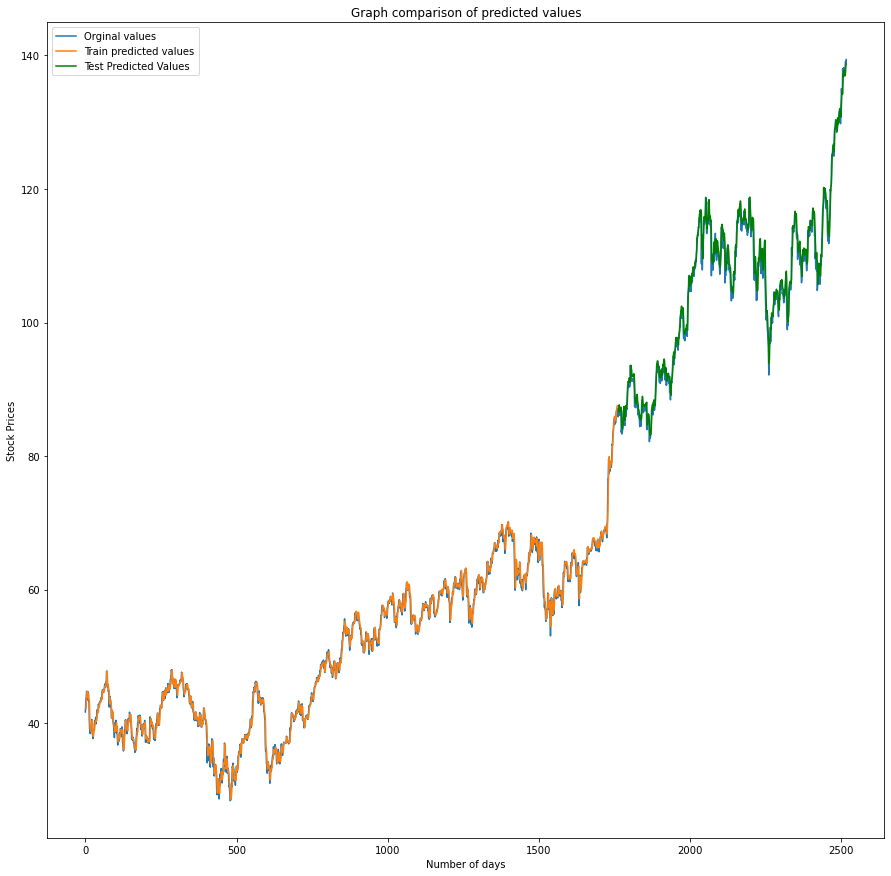

In [21]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPlot)
plt.plot(testPlot,color='g')
plt.title('Graph comparison of predicted values')
plt.xlabel('Number of days')
plt.ylabel('Stock Prices')
plt.legend(['Orginal values','Train predicted values','Test Predicted Values'],loc=2)

In [22]:
def errorpercentage(y_test,pred):
    mape=np.mean(np.abs(y_test-pred)/y_test*100)
    return mape

In [23]:
errorpercentage(scaler.inverse_transform(y_test),test_predict)

1.1124585274906453

In [24]:
a=test_data.shape[0]
x=test_data[a-timestep:]
scaler.inverse_transform(x)

array([[138.63000488],
       [139.3999939 ]])

In [25]:
x.shape

(2, 1)

In [26]:
pred_stocks = data.DataReader(bank, 'yahoo', end+timedelta(1), end+timedelta(22))

In [27]:
pred_stocks

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,141.100006,139.259995,139.789993,141.089996,10803700.0,132.810699
2020-01-03,139.229996,137.080002,137.500000,138.339996,10386800.0,131.058075
2020-01-06,138.270004,136.500000,136.559998,138.229996,10259000.0,130.953842
2020-01-07,137.860001,135.820007,137.279999,135.880005,10531300.0,128.727585
2020-01-08,137.580002,135.600006,135.699997,136.940002,9695300.0,129.731781
2020-01-09,138.229996,137.039993,138.050003,137.440002,9469000.0,130.205460
2020-01-10,137.250000,135.809998,137.210007,136.070007,10190900.0,128.907562
2020-01-13,137.199997,135.759995,136.190002,137.199997,12355200.0,129.978088
2020-01-14,140.759995,137.690002,137.940002,138.800003,24906000.0,131.493866


In [28]:
actual_values=[]
for i in pred_stocks['Close']:
    actual_values.append(i)
actual_values=np.array(actual_values)

In [29]:
actual_values

array([141.08999634, 138.33999634, 138.22999573, 135.88000488,
       136.94000244, 137.44000244, 136.07000732, 137.19999695,
       138.80000305, 136.72000122, 137.25      , 138.19999695,
       136.83999634, 136.67999268, 136.53999329])

In [30]:
## Prediction for next 15 days
i=0
while(i<15):
    length_of_array=len(x)
    if(length_of_array==timestep):
        temp=x;
        temp=temp.reshape(1,timestep,1)
        yget=model.predict(temp)
        x=np.append(x,yget)
    else:
        temp=x[length_of_array-timestep:]
        temp=temp.reshape(1,timestep,1)
        yget=model.predict(temp)
        x=np.append(x,yget)
    i=i+1 

In [31]:
x=x.reshape(-1,1)
actual_values=actual_values.reshape(-1,1)
actual_values
scaler.inverse_transform(x[timestep:])

array([[138.62868717],
       [138.64947213],
       [138.28806127],
       [138.13421549],
       [137.89044051],
       [137.70568529],
       [137.50428754],
       [137.32368799],
       [137.14442513],
       [136.97574335],
       [136.81242159],
       [136.65661047],
       [136.50674169],
       [136.36312627],
       [136.2251885 ]])

In [32]:
act,pred=actual_values[:i],scaler.inverse_transform(x[timestep:])

In [33]:
scaler.inverse_transform(x[timestep:])

array([[138.62868717],
       [138.64947213],
       [138.28806127],
       [138.13421549],
       [137.89044051],
       [137.70568529],
       [137.50428754],
       [137.32368799],
       [137.14442513],
       [136.97574335],
       [136.81242159],
       [136.65661047],
       [136.50674169],
       [136.36312627],
       [136.2251885 ]])

In [34]:
errorpercentage(act,pred)

0.6148085723352916

In [35]:
from sklearn.metrics import mean_absolute_error

In [36]:
mean_absolute_error(act,pred)

0.8476242716059385

In [37]:
y=len(df)-1460
Plotarr=np.empty([y+15,1])
Plotarr[::]=np.nan
Plotarr[y:]=pred

In [38]:
pred    ## stocks for the next 15 days 

array([[138.62868717],
       [138.64947213],
       [138.28806127],
       [138.13421549],
       [137.89044051],
       [137.70568529],
       [137.50428754],
       [137.32368799],
       [137.14442513],
       [136.97574335],
       [136.81242159],
       [136.65661047],
       [136.50674169],
       [136.36312627],
       [136.2251885 ]])

In [2]:
print('The above shows the predicted stock price for 15 days')

The above shows the predicted stock price for 15 days


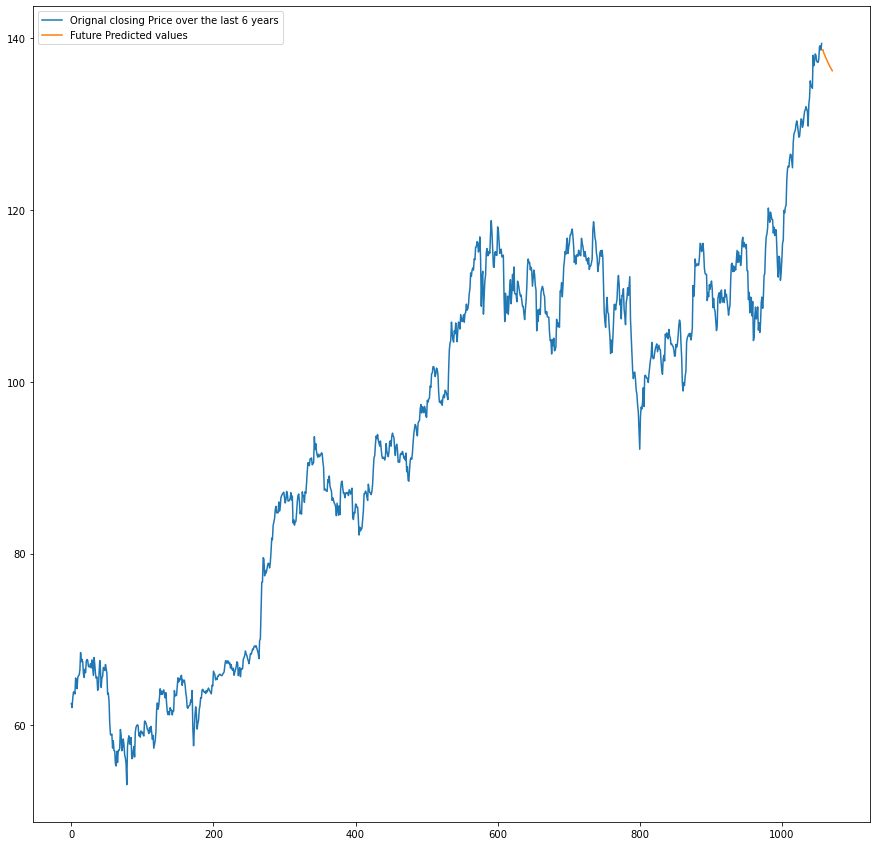

In [40]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(df[1460:])) ## for the 
plt.plot(Plotarr)
plt.legend(['Orignal closing Price over the last 6 years','Future Predicted values'],loc=2)

In [41]:
f=pd.DataFrame(pred, columns = ['Close'])

In [42]:
f.to_csv(bank+'Data',index=False)